In [74]:
# Setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from time import time
from skimage import io
from skimage import filters
from skimage.feature import corner_peaks
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


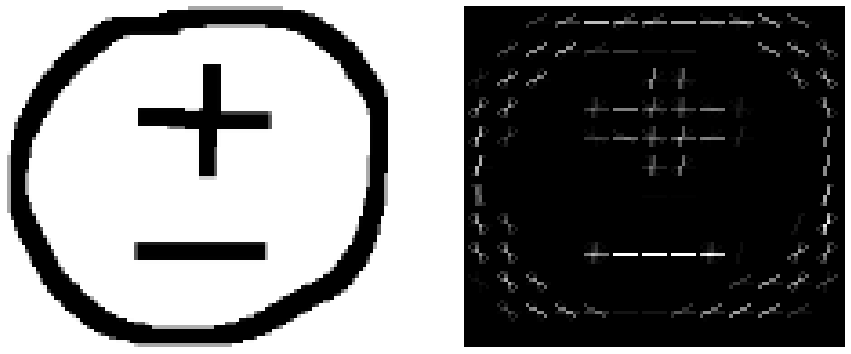

In [75]:
from cs347 import get_hog, plot_hog

# Compute hog representation of voltage source
image_voltagesource = imread('components/voltagesource.png', as_grey=True)
image_voltagesource = rescale(image_voltagesource, 0.6)

(hog_voltagesource, hog_image_voltagesource) = hog_feature(image_voltagesource)

plot_hog(image_voltagesource, hog_image_voltagesource)

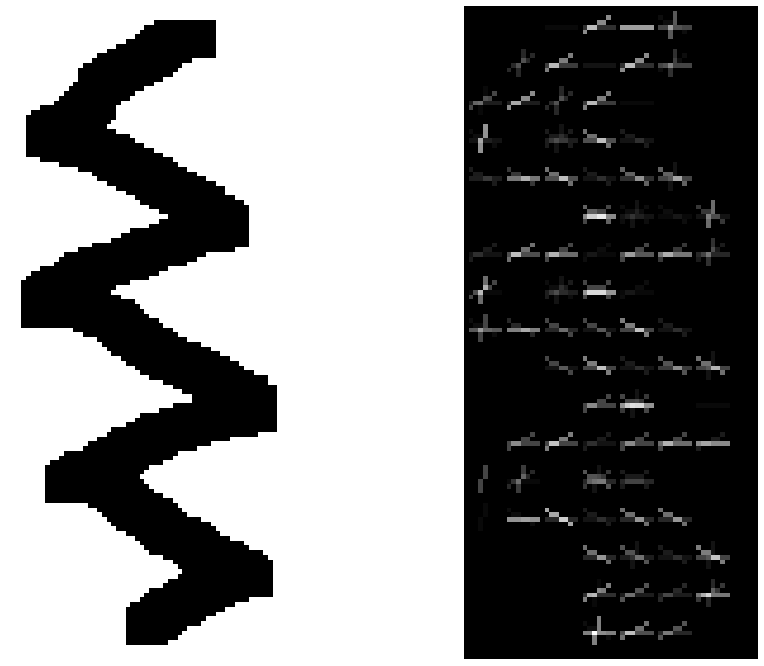

In [76]:
# Compute hog representation of resistor
image_resistor = imread('components/resistor.png', as_grey=True)

(hog_resistor, hog_image_resistor) = hog_feature(image_resistor)

plot_hog(image_resistor, hog_image_resistor)

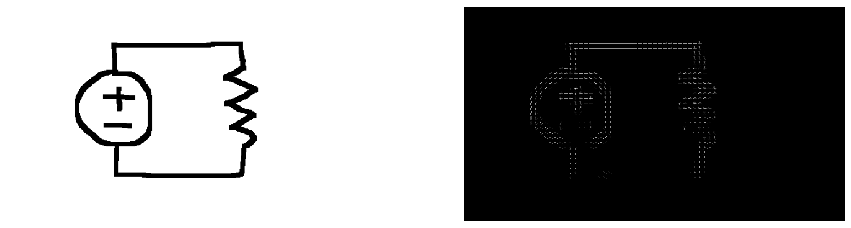

In [77]:
from cs347 import sliding_window, plot_prediction, plot_heatmap

image = io.imread('circuit1.png', as_grey=True)
image = rescale(image, 0.9)

(hog, hogImage) = get_hog(image)

plot_hog(image, hogImage)

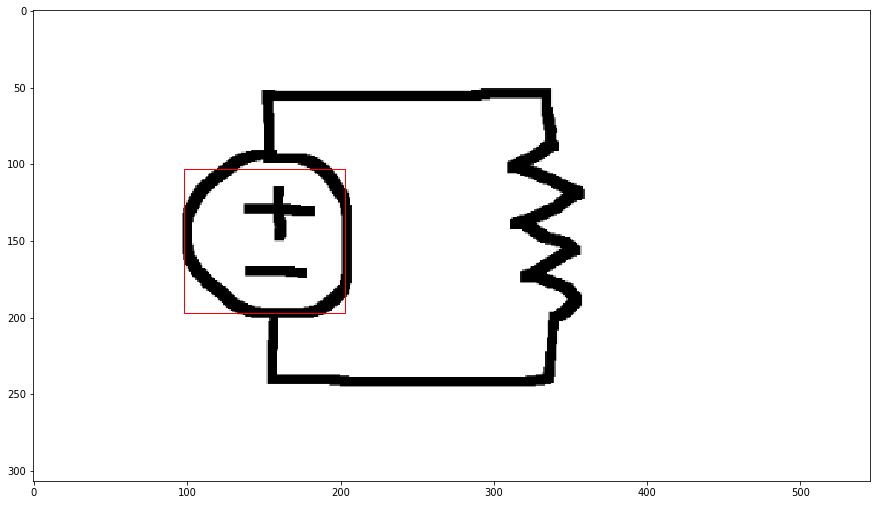

In [85]:
from cs347 import pyramid_score, plot_prediction_pyramid

image = io.imread("circuit1.png", as_grey=True)

# Search for voltage source
(winH, winW) = image_voltagesource.shape
max_score, maxr, maxc, max_scale, max_response_map = pyramid_score \
        (image, hog_voltagesource, image_voltagesource.shape, stepSize = 30, scale=0.8)

plot_prediction_pyramid(image, max_scale, winW, winH, maxc, maxr)

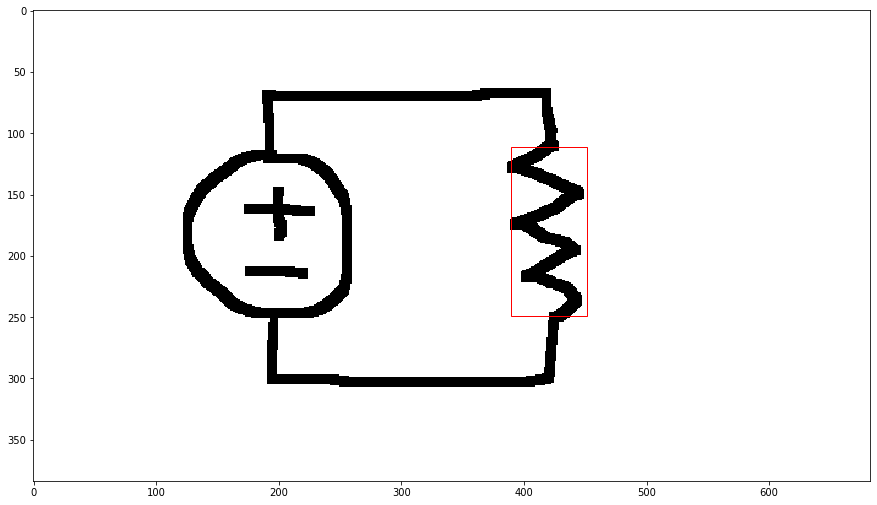

In [86]:
# Search for resistor
(winH, winW) = image_resistor.shape
max_score, maxr, maxc, max_scale, max_response_map = pyramid_score \
        (image, hog_resistor, image_resistor.shape, stepSize = 30, scale=0.8)

plot_prediction_pyramid(image, max_scale, winW, winH, maxc, maxr)